### Задание

Взять данные по [ссылке](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) и:

- Провести разведочный анализ данных
    - Какие зависимости в данных?
    - Сбалансированы ли классы?
    - Основные статистики признаков
- Разделить данные на train/test
    - Разделить на обучающую и тестовую подвыборки
    - Сравнить статистики подвыборок и генеральной выборки
- Обучить модели классификации
    - Какие метрики точности?
    - Какая модель лучше всего справилась?

### Разведочный анализ данных

Подключим библиотеки для анализа данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загружаем данные

In [2]:
df = pd.read_csv("./data/creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


V1 - V28 - числовые входные переменные, которые являются результатом преобразования PCA

Признак "Time" содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. 

Признак "Amount" - это сумма транзакции. 

Признак "Class" - это переменная ответа, и она принимает значение 1 в случае мошенничества и 0 в противном случае.

Проверим датасет на наличие пропусков и удалим их, если такие имеются

In [3]:
skipping_data = df.isna().sum().sum()
print(f'Количество пропусков в данных: {skipping_data}')
# df = df.drop_duplicates()

Количество пропусков в данных: 0


Проверим датасет на наличие дубликатов и удалим их, если такие имеются

In [4]:
df.duplicated().sum()

1081

In [5]:
# Удаление 1080 дубликатов
df_no_duplicates = df.drop_duplicates()

# Проверка результата
df_no_duplicates.duplicated().sum()

0

In [6]:
# Изменение исходного DataFrame
df.drop_duplicates(inplace=True)

Посмотрим на матрицу корреляции

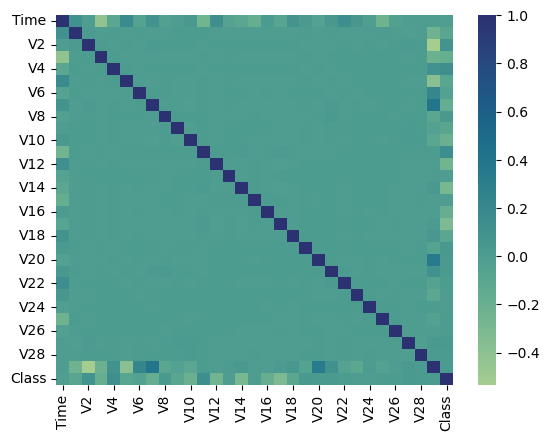

In [7]:
sns.heatmap(df.corr(), cbar = True, cmap = "crest")
plt.show()

Параметры V1-V28 линейно зависят от параметров Time и Amount.

Столбец Time и Amount не скоррелированы с целевой переменной Class.

#### Проверим сбалансированность классов

In [8]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

Видим, что в данной задаче имеется сильный дисбаланс классов.

In [9]:
percent = round(df.Class.value_counts()[1] / df.shape[0] * 100, 3)
print(f'Процент мошеннических операций: {percent}%')

Процент мошеннических операций: 0.167%


#### Основные статистики признаков

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Исследуем взаимосвязь признаков

C:\Users\anyag\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


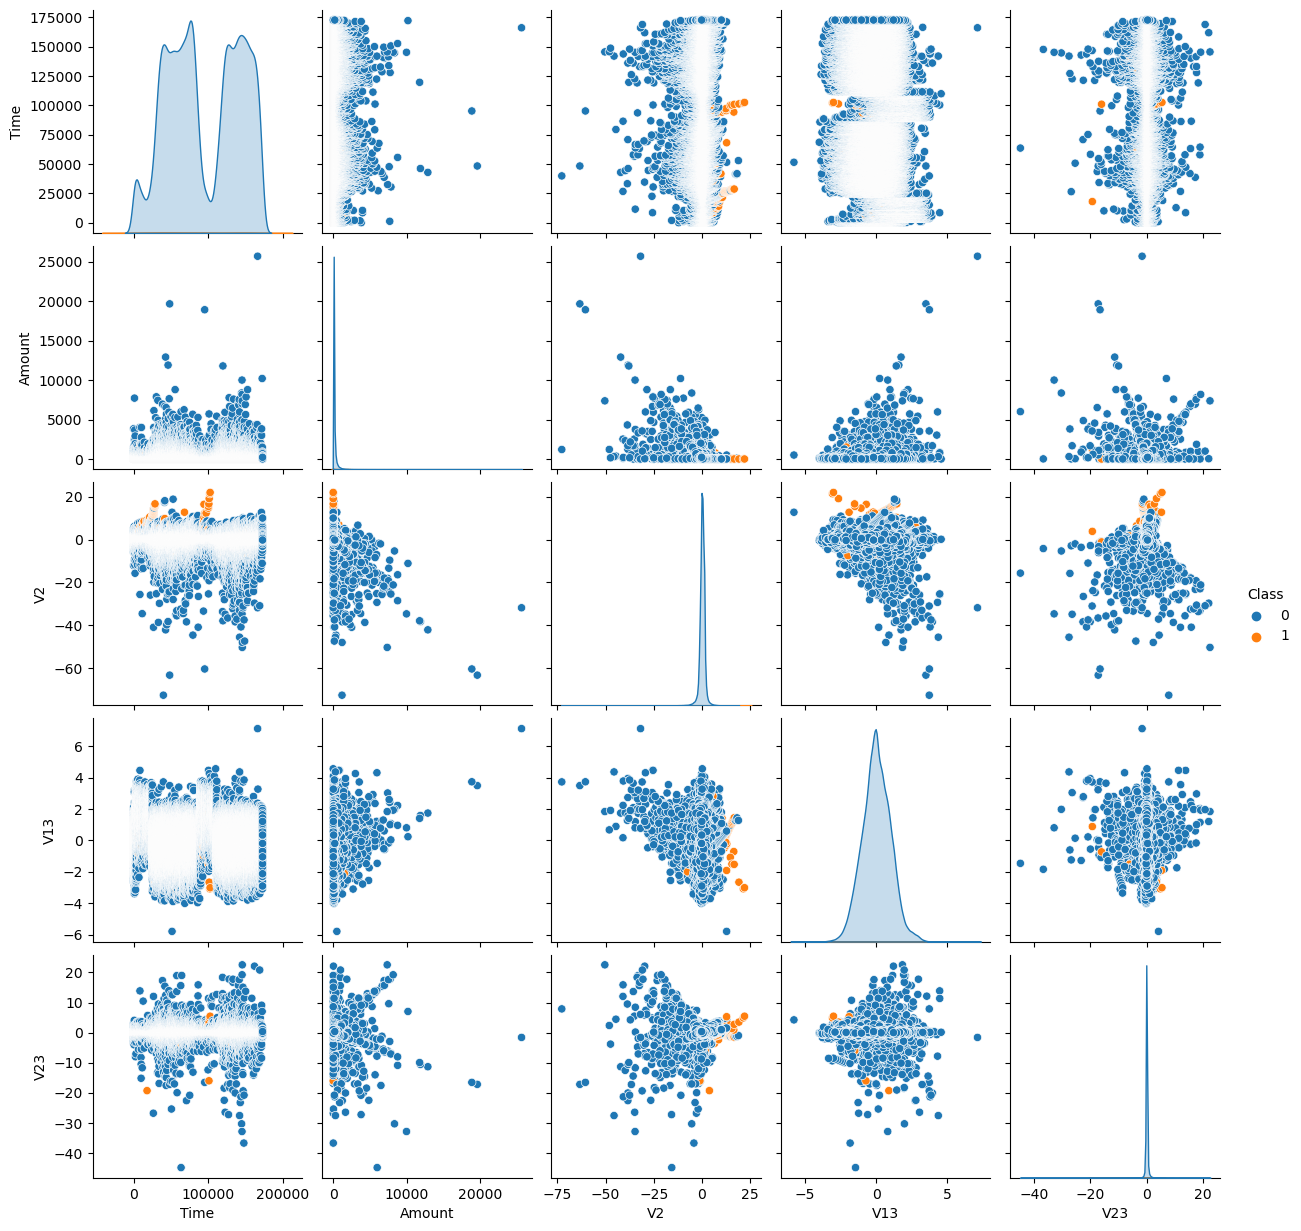

In [11]:
parameters = ['Time', 'Amount', 'V2', 'V13', 'V23']
data = df[parameters + ['Class']]
sns.pairplot(data, hue = 'Class', diag_kind = 'auto')
plt.show()

Во многих случаях взаимосвязь нелинейная -> лучше использовать нелинейный модели. 

<Axes: >

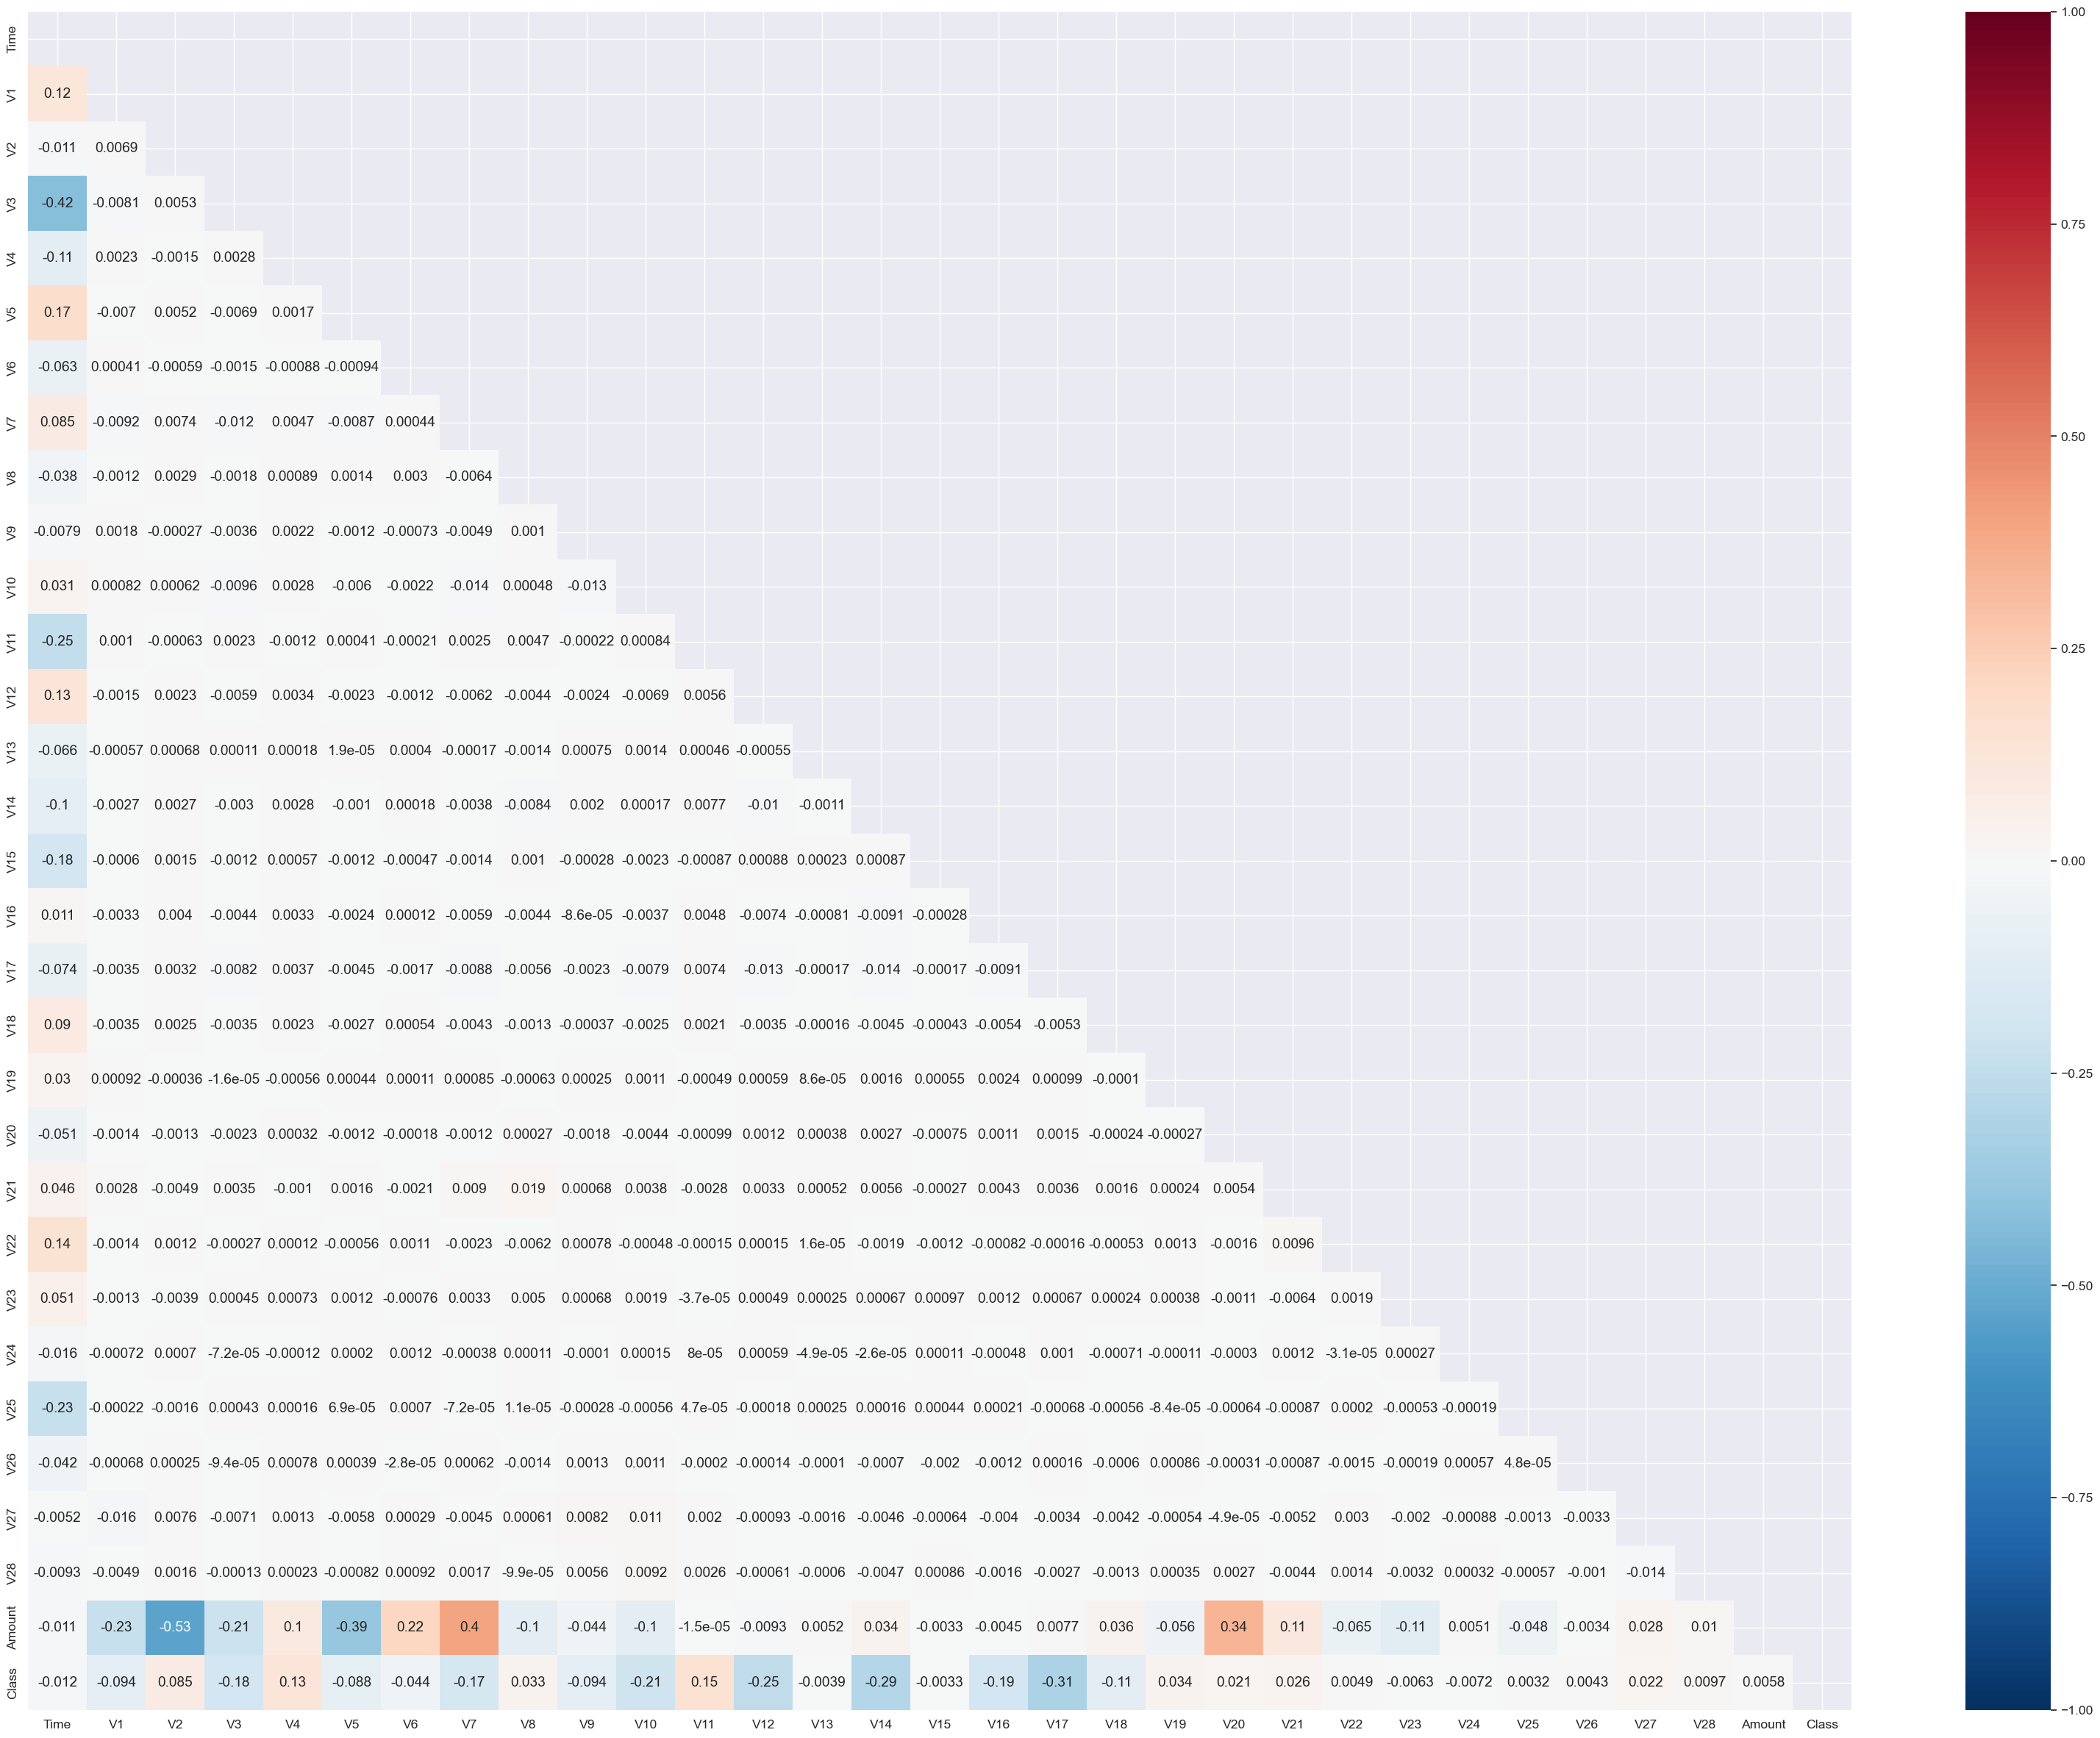

In [12]:
plt.figure(figsize=(40,30))
sns.set(font_scale=1.15)
sns.heatmap(df.corr(),
            cmap='RdBu_r', 
            annot=True, 
            vmin=-1, vmax=1,
            mask=np.triu(df.corr()))

Видим, что критерии плохо коррелируют друг с другом. Однако, корреляции между V1-V28 и критериями Time и Amount больше, чем между остальными выличинами. Также видно, что признаки V1 - V28 в большинстве своем имеют связь с целевой переменной.

### Разделение данных на train/test

Разделим датасет на тренировочную и тестовую выборки

In [13]:
df.loc[(df['Class'] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
# Разделение данных на обучающую и тестовую выборки в соотношении 80 % и 20 %
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2)

In [15]:
# Cтатистики генеральной выборки
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [16]:
# Статистики обучающей выборки
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,94873.304600,0.008180,-0.003858,0.003018,-0.001502,0.001280,-0.001489,0.002575,-0.000957,-0.001949,...,0.000364,0.000199,0.001570,0.000219,0.000025,-0.000590,0.000402,0.002144,0.001236,88.440165
std,47446.709685,1.938168,1.630300,1.503949,1.411336,1.372100,1.329067,1.223038,1.180431,1.092410,...,0.762649,0.725211,0.723268,0.605412,0.605163,0.519447,0.481708,0.394037,0.329636,247.595251
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-8.887017,-32.828995,-2.836627,-8.696627,-2.241620,-22.565679,-15.430084,0.000000
25%,54265.000000,-0.915129,-0.599156,-0.888486,-0.847560,-0.688678,-0.767941,-0.552200,-0.209190,-0.643806,...,-0.211157,-0.227939,-0.541833,-0.161891,-0.354375,-0.318227,-0.326508,-0.070449,-0.052736,5.510000
50%,84780.000000,0.021959,0.065060,0.179963,-0.021407,-0.051794,-0.274538,0.041045,0.022152,-0.052800,...,-0.062037,-0.028666,0.008927,-0.011624,0.040637,0.015506,-0.052175,0.001565,0.011252,22.000000
75%,139310.000000,1.316635,0.801025,1.027645,0.740210,0.611671,0.395084,0.570501,0.325625,0.595649,...,0.133101,0.186769,0.530217,0.147206,0.439272,0.350759,0.240341,0.091492,0.078443,77.500000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,73.301626,120.589494,20.007208,15.594995,...,26.237391,27.202839,10.503090,22.528412,4.584549,7.519589,3.463246,31.612198,33.847808,25691.160000


In [17]:
# Cтатистики тестовой выборки
X_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,...,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000
mean,94562.173986,-0.003134,-0.005242,-0.004008,-0.008824,0.004016,0.000258,-0.001295,-0.000444,-0.000186,...,-0.000521,-0.002650,-0.006355,0.000115,0.000973,0.001199,-0.000860,0.000239,-0.002206,88.602773
std,47617.756491,1.986960,1.710758,1.527467,1.425518,1.396480,1.343335,1.246000,1.173542,1.107745,...,0.798659,0.718680,0.729630,0.692050,0.607483,0.528255,0.483431,0.402501,0.321497,261.317462
min,2.000000,-46.855047,-63.344698,-31.813586,-5.600607,-42.147898,-23.496714,-31.197329,-50.943369,-9.481456,...,-23.646890,-22.665685,-10.933144,-44.807735,-2.824849,-10.295397,-2.604551,-9.895244,-9.617915,0.000000
25%,53945.000000,-0.919973,-0.605162,-0.894793,-0.860945,-0.694199,-0.772935,-0.554125,-0.207071,-0.647190,...,-0.212557,-0.230248,-0.546285,-0.160642,-0.354904,-0.314633,-0.328074,-0.071427,-0.053160,5.900000
50%,84535.500000,0.012049,0.059055,0.179989,-0.026117,-0.061226,-0.277473,0.039741,0.020880,-0.049201,...,-0.063482,-0.032742,-0.003109,-0.009154,0.042850,0.018703,-0.052047,0.001119,0.011451,22.000000
75%,139247.500000,1.314343,0.797141,1.025217,0.737368,0.615083,0.403129,0.570356,0.325942,0.597464,...,0.133650,0.184122,0.521405,0.150075,0.441554,0.350083,0.239887,0.090014,0.077573,77.725000
max,172783.000000,2.451888,17.418649,4.226108,16.875344,34.099309,22.529298,36.677268,19.168327,10.348407,...,39.420904,22.588989,7.220158,17.751731,4.014444,5.852484,3.517346,11.135740,15.769636,19656.530000


In [18]:
y_test.describe()

count    56746.000000
mean         0.001903
std          0.043585
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

In [19]:
y_train.describe()

count    226980.000000
mean          0.001608
std           0.040069
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

Статистики генеральной, обучающей и тестовой выборок схожи.

### Обучение модели классификации

##### Логистическая регрессия (LogisticRegression)

Для работы с несбалансированными датасетами удобно воспользоваться одним из базовых алгоритмов машинного обучения - логистической регрессией.

In [20]:
from sklearn.linear_model import LogisticRegression
# используемые метрики точности
from sklearn.metrics import accuracy_score, precision_score, recall_score

import time

In [21]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [32]:
# Объект класса LogisticRegression
logreg = LogisticRegression(random_state=21, max_iter=1000, multi_class='multinomial')

# Время обучения
start_time = time.time()

# Обучение модели
logreg.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

# Прогноз
# Время прогноза
start_time = time.time()

y_pred_logreg = logreg.predict(X_test)

end_time = time.time()
predicting_time = end_time - start_time

In [33]:
# Вычисление метрик точности
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)

In [34]:
print('Точность модели (accuracy score): {:.3%}'.format(accuracy_logreg),
      'Точность модели (precision score): {:.3%}'.format(precision_logreg),
      'Полнота модели (recall score): {:.3%}'.format(recall_logreg),
      'Время обучения модели: {:.3f} секунд'.format(training_time),
      'Время прогноза: {:.3f} секунд'.format(predicting_time), sep='\n')

Точность модели (accuracy score): 99.921%
Точность модели (precision score): 90.909%
Полнота модели (recall score): 64.815%
Время обучения модели: 29.308 секунд
Время прогноза: 0.008 секунд


##### Алгоритм KNN (KNeighborsClassifier)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# Объект класса KNN с параметром n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=3)

# Времяи обучения
start_time = time.time() 

# Обучение модели
knn.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

# Прогноз
# Время прогноза
start_time = time.time()

y_pred = knn.predict(X_test)

end_time = time.time()
predicting_time = end_time - start_time

In [27]:
# Вычисление метрик точности
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [28]:
print('Точность модели (accuracy score): {:.3%}'.format(accuracy),
      'Точность модели (precision score): {:.3%}'.format(precision),
      'Полнота модели (recall score): {:.3%}'.format(recall),
      'Время обучения модели: {:.3f} секунд'.format(training_time),
      'Время прогноза: {:.3f} секунд'.format(predicting_time), sep='\n')

Точность модели (accuracy score): 99.818%
Точность модели (precision score): 77.778%
Полнота модели (recall score): 6.481%
Время обучения модели: 0.062 секунд
Время прогноза: 20.626 секунд


In [1]:
# pip install catboost

In [29]:
from catboost import CatBoostClassifier

In [30]:
# Объект класса CatBoostClassifier
catboost = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1, loss_function='Logloss', random_state=42)

# Время обучения
start_time = time.time()

# Обучение модели
catboost.fit(X_train, y_train, verbose=0)

end_time = time.time()
training_time = end_time - start_time

# Прогноз
# Время прогноза
start_time = time.time()

y_pred_catboost = catboost.predict(X_test)

end_time = time.time()
predicting_time = end_time - start_time

# Вычисление метрик точности
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)

In [31]:
print('Точность модели (accuracy score): {:.3%}'.format(accuracy_catboost),
      'Точность модели (precision score): {:.3%}'.format(precision_catboost),
      'Полнота модели (recall score): {:.3%}'.format(recall_catboost),
      'Время обучения модели: {:.3f} секунд'.format(training_time),
      'Время прогноза: {:.3f} секунд'.format(predicting_time), sep='\n')

Точность модели (accuracy score): 99.956%
Точность модели (precision score): 98.824%
Полнота модели (recall score): 77.778%
Время обучения модели: 15.832 секунд
Время прогноза: 0.037 секунд


### Вывод

По итогу работы были обучены три модели для обнаружения мошенничества с кредитными картами: LogisticRegression, KNeighborsClassifier, CatBoostClassifier.

Судя по метрикам, лучший результат показал CatBoostClassifier. Модель линейной регрессии также показывет хорошие результаты, однако она имеет самое большое время обучения.